# TCGA Dataset Overview

* Metadata of the whole TCGA dataset:   
  `deep-nexus.tcga.TCGA_slides_metadata`. 30267 records in total.
* Metadata of only ffpe slides:    
  `deep-nexus.tcga.ffpe_slides_metadata`. 11963 records in total.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

## Get data

In [2]:
%%bigquery tcga_metadata
SELECT *
FROM `deep-nexus.tcga.TCGA_slides_metadata`

In [3]:
%%bigquery ffpe_metadata
SELECT *
FROM `deep-nexus.tcga.ffpe_slides_metadata`

In [4]:
tcga_metadata.head()

,case_barcode,disease_code,sample_barcode,portion_id,slide_id,bcr,sample_type,sample_type_name,avg_percent_tumor_cells,slide_barcode,file_gdc_id,file_gcs_url,is_ffpe
0,TCGA-4X-A9F9,THYM,TCGA-4X-A9F9-01Z,00,DXD,None,None,None,NaN,TCGA-4X-A9F9-01Z-00-DXD,4e539380-efc0-41cf-99d4-fe24246e8faf,gs://gdc-tcga-phs000178-open/4e539380-efc0-41c...,YES
1,TCGA-AA-A02Y,COAD,TCGA-AA-A02Y-01A,04,BS4,Nationwide Children's Hospital,01,Primary solid Tumor,71.5,TCGA-AA-A02Y-01A-04-BS4,ad50bfe3-f40d-4dae-9ee8-7860888092af,gs://gdc-tcga-phs000178-open/ad50bfe3-f40d-4da...,NO
2,TCGA-BH-A0DQ,BRCA,TCGA-BH-A0DQ-01A,01,MSA,Nationwide Children's Hospital,01,Primary solid Tumor,72.0,TCGA-BH-A0DQ-01A-01-MSA,11625bb9-c070-44e4-aa95-50a8ef7ea631,gs://gdc-tcga-phs000178-open/11625bb9-c070-44e...,NO
3,TCGA-A2-A0YG,BRCA,TCGA-A2-A0YG-01A,02,BSB,Nationwide Children's Hospital,01,Primary solid Tumor,80.0,TCGA-A2-A0YG-01A-02-BSB,6f396289-db28-4fd1-af9e-6a52a8ed64d7,gs://gdc-tcga-phs000178-open/6f396289-db28-4fd...,NO
4,TCGA-B6-A0X7,BRCA,TCGA-B6-A0X7-01A,01,MS1,Nationwide Children's Hospital,01,Primary solid Tumor,90.0,TCGA-B6-A0X7-01A-01-MS1,44de89a8-d814-449f-a32c-6dc627903c14,gs://gdc-tcga-phs000178-open/44de89a8-d814-449...,NO


In [5]:
ffpe_metadata.head()

,case_barcode,disease_code,sample_barcode,portion_id,slide_id,bcr,sample_type,sample_type_name,avg_percent_tumor_cells,slide_barcode,file_gdc_id,file_gcs_url,is_ffpe
0,TCGA-AA-3496,COAD,TCGA-AA-3496-01Z,00,DX1,None,None,None,NaN,TCGA-AA-3496-01Z-00-DX1,98cfad40-6769-4fd7-8058-ca5ac2ea1763,gs://gdc-tcga-phs000178-open/98cfad40-6769-4fd...,YES
1,TCGA-AA-3489,COAD,TCGA-AA-3489-01Z,00,DX1,None,None,None,NaN,TCGA-AA-3489-01Z-00-DX1,9d4df4ec-99aa-4acd-a1c5-822a38694547,gs://gdc-tcga-phs000178-open/9d4df4ec-99aa-4ac...,YES
2,TCGA-NF-A4WX,UCS,TCGA-NF-A4WX-01Z,00,DX1,None,None,None,NaN,TCGA-NF-A4WX-01Z-00-DX1,64662ff2-3e62-4418-abb0-850c40e008df,gs://gdc-tcga-phs000178-open/64662ff2-3e62-441...,YES
3,TCGA-NF-A4WU,UCS,TCGA-NF-A4WU-01Z,00,DX1,None,None,None,NaN,TCGA-NF-A4WU-01Z-00-DX1,6ff2c4f0-0b93-4197-a1d0-106e8cef69ac,gs://gdc-tcga-phs000178-open/6ff2c4f0-0b93-419...,YES
4,TCGA-NF-A5CP,UCS,TCGA-NF-A5CP-01Z,00,DX1,None,None,None,NaN,TCGA-NF-A5CP-01Z-00-DX1,afbb6e68-67eb-4804-a1b0-e1082bfde0f9,gs://gdc-tcga-phs000178-open/afbb6e68-67eb-480...,YES


In [6]:
tcga_metadata.shape

(30267, 13)

In [7]:
ffpe_metadata.shape

(11963, 13)

In [8]:
tcga_metadata.columns

Index(['case_barcode', 'disease_code', 'sample_barcode', 'portion_id',
       'slide_id', 'bcr', 'sample_type', 'sample_type_name',
       'avg_percent_tumor_cells', 'slide_barcode', 'file_gdc_id',
       'file_gcs_url', 'is_ffpe'],
      dtype='object')

## Data Resource

(array([0, 1]), <a list of 2 Text xticklabel objects>)

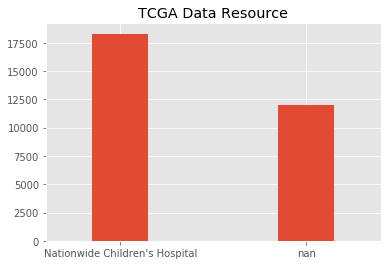

In [53]:
tcga_metadata.bcr.value_counts(dropna=False).plot(kind='bar', width=0.3)
plt.title('TCGA Data Resource')
plt.xticks(rotation=0)

## Slide Number by Cohort

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

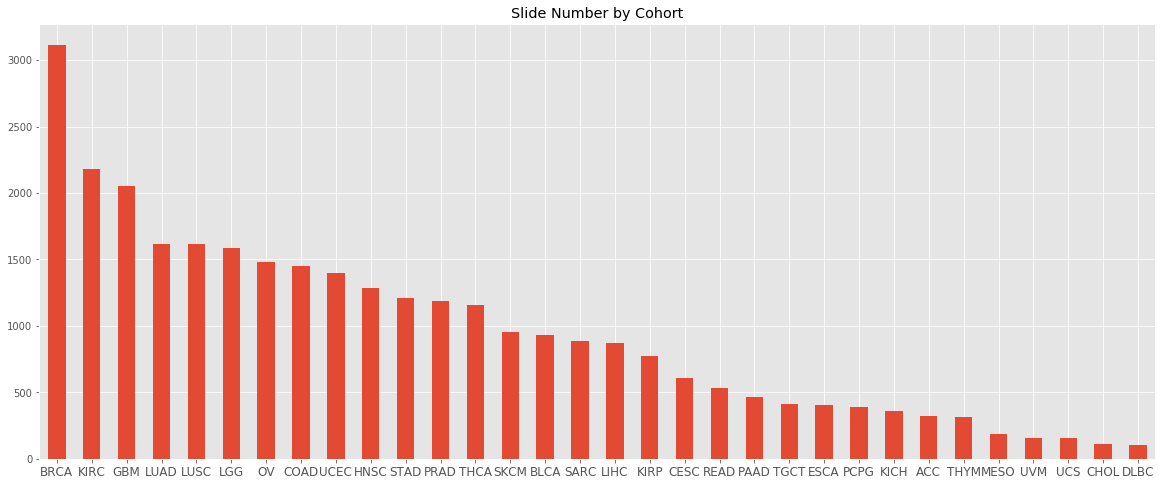

In [10]:
plt.figure(figsize=(20, 8))
tcga_metadata['disease_code'].value_counts().plot(kind='bar')
plt.title('Slide Number by Cohort')
plt.xticks(rotation=0, size=12)

## ffpe/frozen Slides by Cohort

In [11]:
ffpe_count = tcga_metadata.groupby(['disease_code', 'is_ffpe']).size().unstack()
ffpe_count.head()

is_ffpe,NO,YES
disease_code,,
ACC,96,227
BLCA,469,460
BRCA,1972,1144
CESC,325,282
CHOL,71,39


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

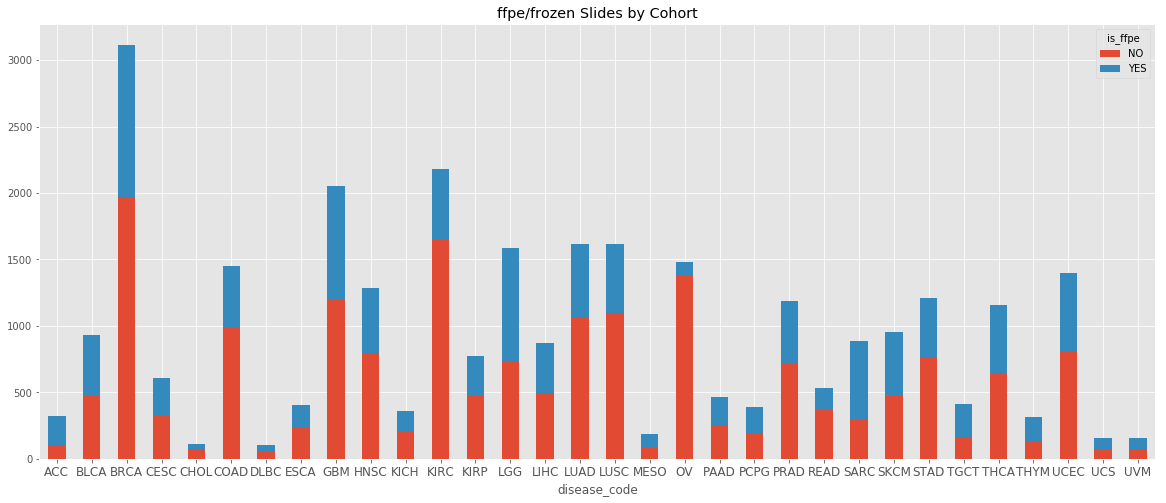

In [23]:
ffpe_count.plot(kind='bar', stacked=True, figsize=(20,8))
plt.title('ffpe/frozen Slides by Cohort')
plt.xticks(rotation=0, size=12)

## Sample Type Name by Cohort

### 1. frozen

In [36]:
frozen_tcount = tcga_metadata[tcga_metadata['is_ffpe'] == 'NO'].groupby(['disease_code', 'sample_type_name']).size().unstack()
frozen_tcount.head()

sample_type_name,Additional - New Primary,Additional Metastatic,Metastatic,Primary solid Tumor,Recurrent Solid Tumor,Solid Tissue Normal
disease_code,,,,,,
ACC,NaN,NaN,NaN,92.0,NaN,4.0
BLCA,NaN,NaN,1.0,431.0,NaN,37.0
BRCA,NaN,NaN,7.0,1567.0,NaN,381.0
CESC,NaN,NaN,2.0,315.0,NaN,8.0
CHOL,NaN,NaN,NaN,51.0,NaN,20.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

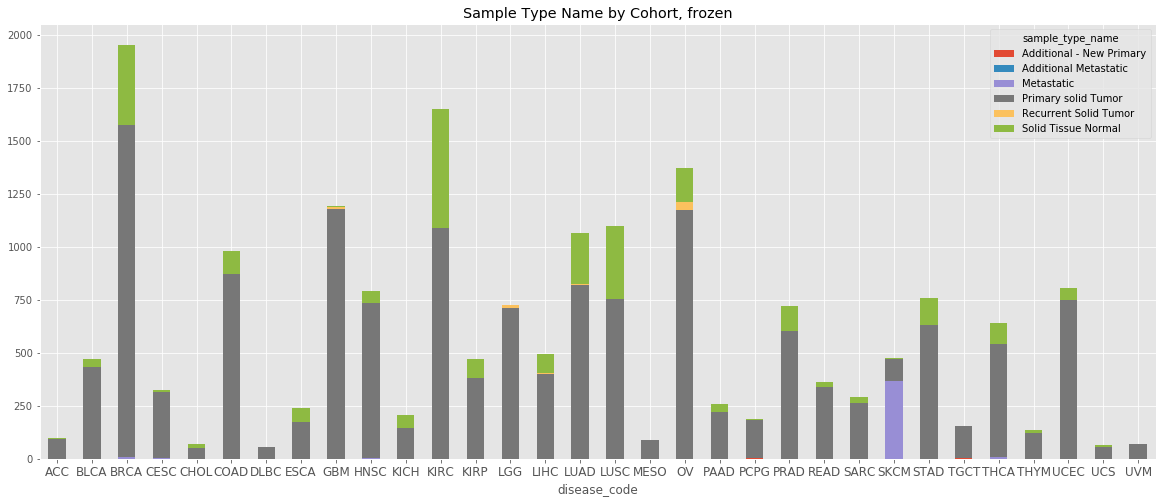

In [37]:
frozen_tcount.plot(kind='bar', stacked=True, figsize=(20,8))
plt.title('Sample Type Name by Cohort, frozen')
plt.xticks(rotation=0, size=12)

### 2. ffpe

In [42]:
ffpe_tcount = tcga_metadata[tcga_metadata['is_ffpe'] == 'YES'].astype('str').groupby(['disease_code', 'sample_type_name']).size().unstack()
ffpe_tcount.head()

sample_type_name,None,Primary solid Tumor
disease_code,,
ACC,227.0,NaN
BLCA,460.0,NaN
BRCA,1131.0,13.0
CESC,280.0,2.0
CHOL,39.0,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

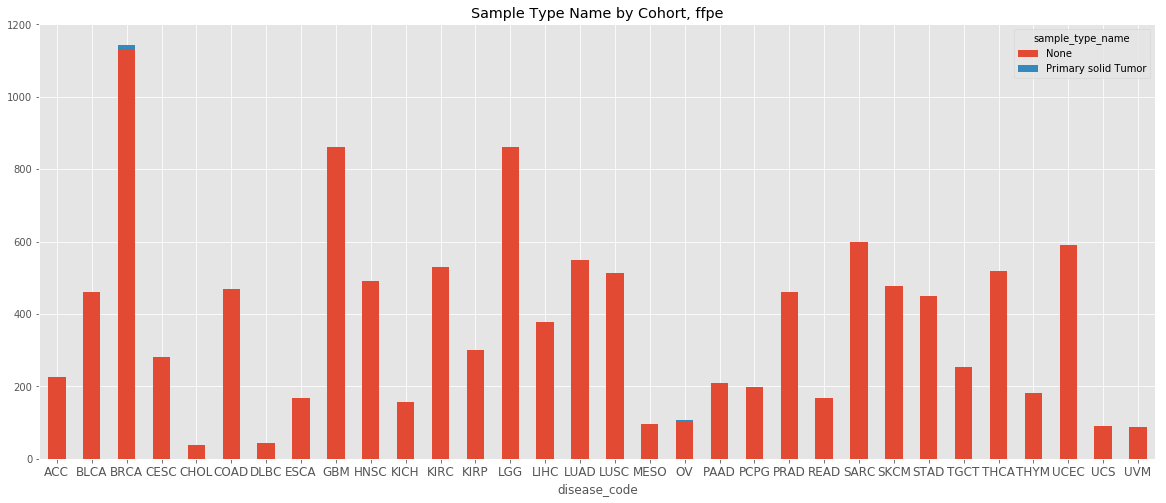

In [43]:
ffpe_tcount.plot(kind='bar', stacked=True, figsize=(20,8))
plt.title('Sample Type Name by Cohort, ffpe')
plt.xticks(rotation=0, size=12)

## Purity - Average Percent Tumor Cells

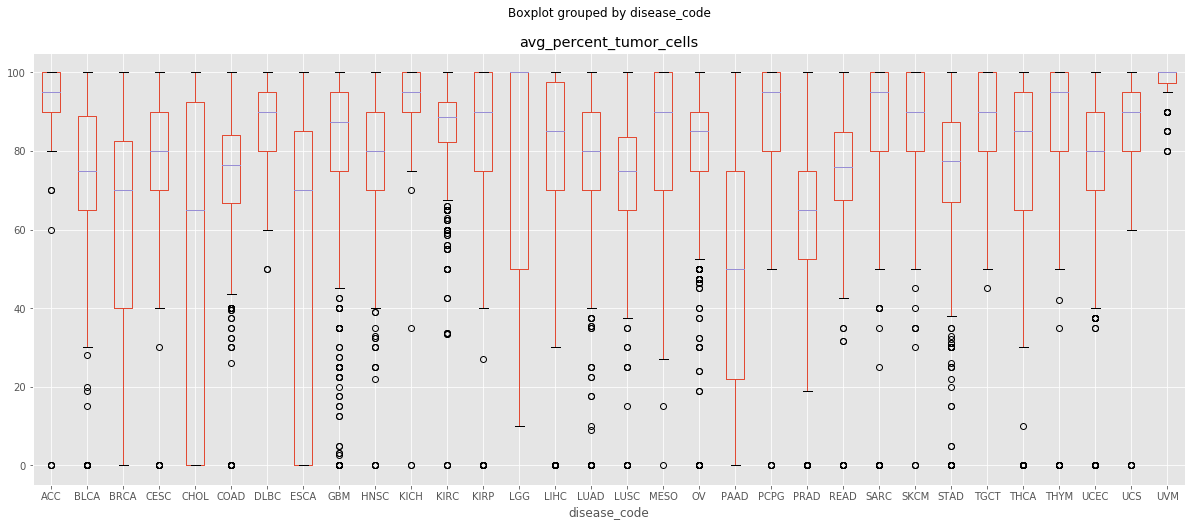

In [60]:
tcga_metadata.boxplot(column='avg_percent_tumor_cells', by='disease_code', figsize=(20,8))

In [67]:
ffpe_pcount = ffpe_metadata['avg_percent_tumor_cells'].value_counts(dropna=False)
ffpe_pcount

NaN     11945
80.0       11
63.0        4
90.0        3
Name: avg_percent_tumor_cells, dtype: int64

In [78]:
frozen_pcount = tcga_metadata[tcga_metadata['is_ffpe']=='NO']['avg_percent_tumor_cells'].value_counts(dropna=False)
frozen_pcount

100.0    2149
NaN      1924
80.0     1319
90.0     1297
0.0      1052
         ... 
2.0         1
2.5         1
41.0        1
9.0         1
14.0        1
Name: avg_percent_tumor_cells, Length: 202, dtype: int64

([<matplotlib.axis.YTick at 0x7fd48f0ace10>,
 <a list of 11 Text yticklabel objects>)

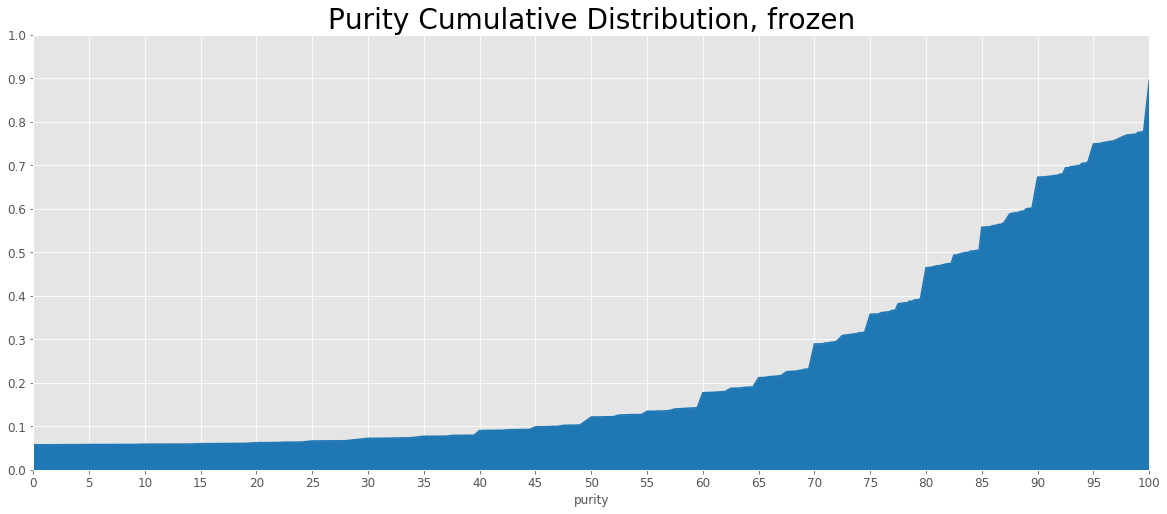

In [101]:
(np.cumsum(frozen_pcount.sort_index())/frozen_pcount.sum()).plot(kind='area', figsize=(20,8), color='tab:blue')
plt.title('Purity Cumulative Distribution, frozen', size=28)
plt.xlabel('purity')
plt.xticks(np.arange(0, 105, 5), size=12)
plt.yticks(np.arange(0, 1.05, 0.1), size=12)